<a href="https://colab.research.google.com/github/shin19850211/107-2-Multimedia/blob/master/keras_MLP_h1000_dropout_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [0]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [0]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))

In [0]:
model.add(Dropout(0.5))

In [0]:
model.add(Dense(units=1000,
kernel_initializer='normal',
activation='relu'))
model.add(Dropout(0.5))

In [0]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [31]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [33]:
train_history =model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.3636 - acc: 0.8863 - val_loss: 0.1327 - val_acc: 0.9614
Epoch 2/10
 - 2s - loss: 0.1584 - acc: 0.9513 - val_loss: 0.1000 - val_acc: 0.9694
Epoch 3/10
 - 2s - loss: 0.1177 - acc: 0.9627 - val_loss: 0.0882 - val_acc: 0.9721
Epoch 4/10
 - 2s - loss: 0.0971 - acc: 0.9707 - val_loss: 0.0878 - val_acc: 0.9732
Epoch 5/10
 - 2s - loss: 0.0837 - acc: 0.9735 - val_loss: 0.0839 - val_acc: 0.9758
Epoch 6/10
 - 2s - loss: 0.0763 - acc: 0.9763 - val_loss: 0.0774 - val_acc: 0.9776
Epoch 7/10
 - 2s - loss: 0.0648 - acc: 0.9789 - val_loss: 0.0766 - val_acc: 0.9768
Epoch 8/10
 - 2s - loss: 0.0589 - acc: 0.9811 - val_loss: 0.0770 - val_acc: 0.9790
Epoch 9/10
 - 2s - loss: 0.0560 - acc: 0.9819 - val_loss: 0.0713 - val_acc: 0.9796
Epoch 10/10
 - 2s - loss: 0.0539 - acc: 0.9829 - val_loss: 0.0765 - val_acc: 0.9798


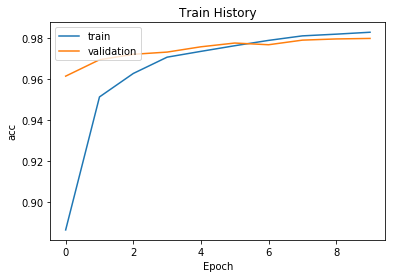

In [34]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(train_history,'acc','val_acc')

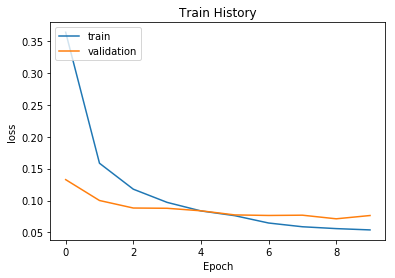

In [35]:
show_train_history(train_history,'loss','val_loss')

In [36]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 64us/step

accuracy= 0.9789


In [37]:
prediction=model.predict_classes(x_Test)
prediction

array([7, 2, 1, ..., 4, 5, 6])

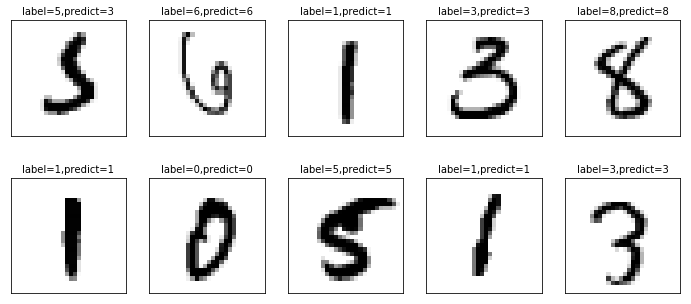

In [38]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
           title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

In [39]:
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,1,1,1,0,1,3,1,1,0
1,0,1128,3,1,0,1,2,0,0,0
2,6,1,1015,2,1,0,1,5,1,0
3,0,0,3,998,0,0,0,3,2,4
4,2,2,3,0,964,0,4,1,0,6
5,3,0,0,27,0,847,6,0,5,4
6,4,3,0,1,1,1,947,0,1,0
7,1,9,7,1,0,0,0,1005,0,5
8,3,0,9,12,2,8,3,7,926,4


In [40]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [41]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
412,5,3
674,5,3
1003,5,3
1331,5,3
1393,5,3
1670,5,3
1970,5,3
2369,5,3
2526,5,3


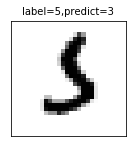

In [42]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)

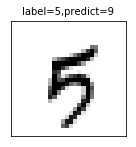

In [43]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=1289,num=1)